# Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, cluster
from sklearn.datasets import make_blobs
import time

In [2]:
n_samples = 1500

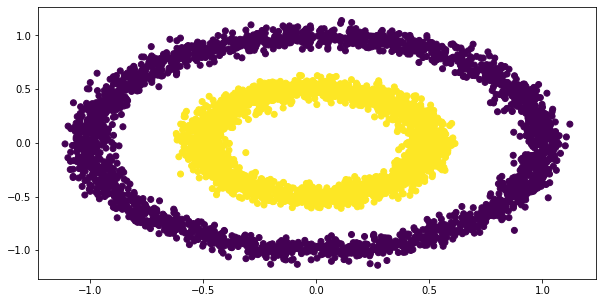

In [3]:
noisy_circles, y_noisy_circles = datasets.make_circles(n_samples = 5000,factor = 0.5,noise = .05,random_state = 0)

plt.figure(figsize = (10,5))
plt.scatter(noisy_circles[:,0],noisy_circles[:,1], c = y_noisy_circles)
plt.show()

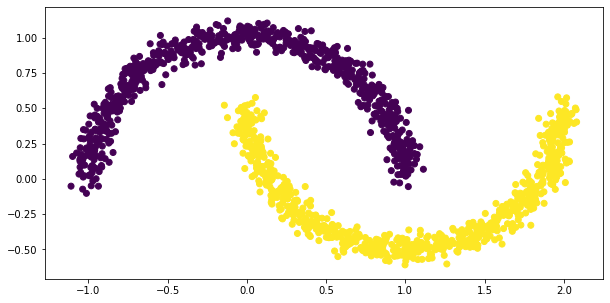

In [13]:
noisy_moons, y_noisy_moons = datasets.make_moons(n_samples = n_samples, noise = .05)

plt.figure(figsize = (10,5))
plt.scatter(noisy_moons[:,0],noisy_moons[:,1], c = y_noisy_moons)
plt.show()

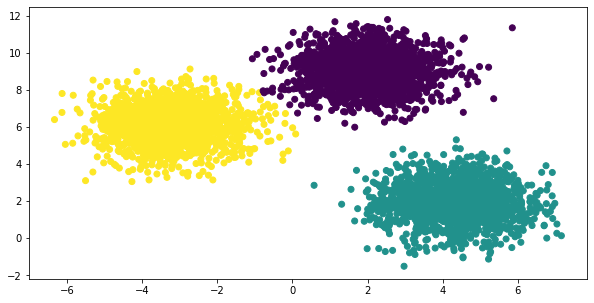

In [14]:
blobs, y_blobs = datasets.make_blobs(n_samples = 5000,random_state = 0,center_box = (-21,21))

plt.figure(figsize = (10,5))
plt.scatter(blobs[:,0], blobs[:,1], c = y_blobs)
plt.show()

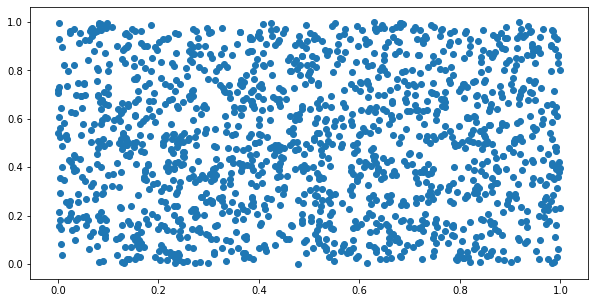

In [15]:
no_structure = np.random.rand(n_samples, 2)

plt.figure(figsize = (10,5))
plt.scatter(no_structure[:,0], no_structure[:,1])
plt.show()

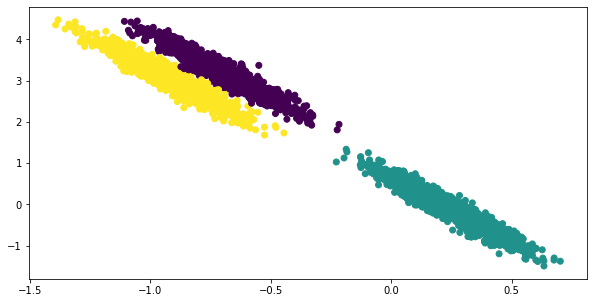

In [16]:
transformation = [[0.1, -0.2], [-0.1, 0.4]]
blobs_aniso = np.dot(blobs, transformation)

plt.figure(figsize = (10,5))
plt.scatter(blobs_aniso[:,0], blobs_aniso[:,1], c = y_blobs)
plt.show()


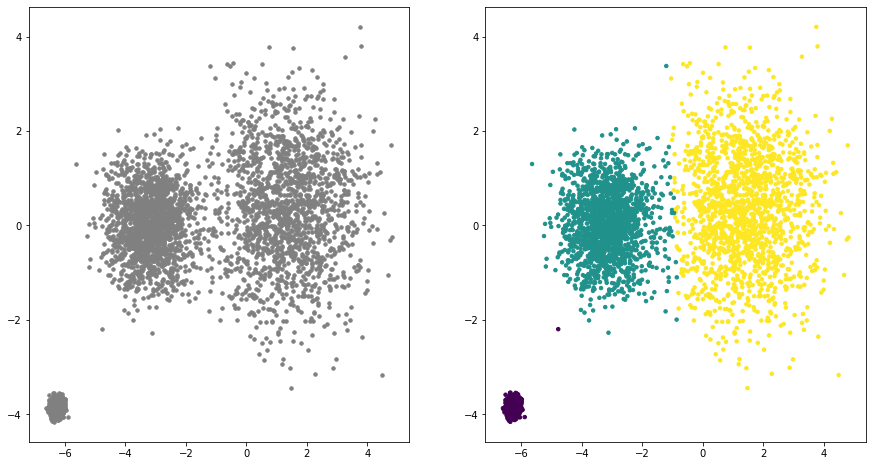

In [48]:
random_state = 170
blobs_varied,y_blobs_varied = datasets.make_blobs(n_samples = 5000, random_state = 170, 
                                                  center_box = (-7,7),
                                                  cluster_std = [0.1, 0.7, 1.2])



data = blobs_varied


mod_KMeans = cluster.MiniBatchKMeans(n_clusters = 3)
mod_KMeans.fit(data)
        
plt.figure(figsize = (15,8))
plt.subplot(121)
plt.scatter(blobs_varied[:,0], blobs_varied[:,1], color = 'grey', s=12)
plt.subplot(122)
plt.scatter(data[:,0], data[:,1], c = mod_KMeans.labels_,  s = 12)
plt.show()

# K-Means

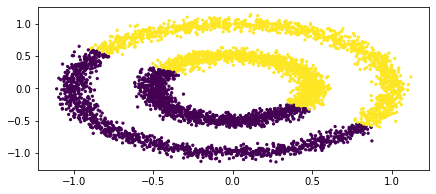

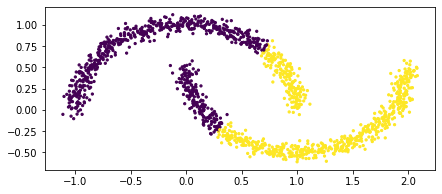

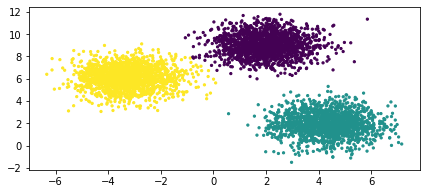

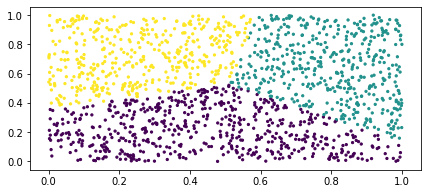

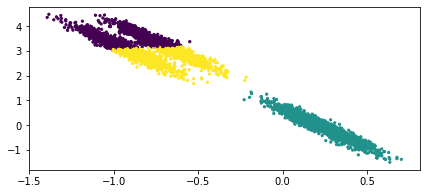

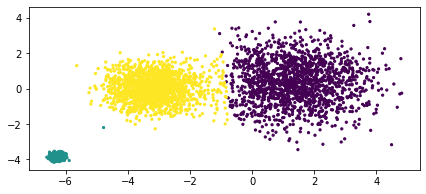

In [25]:
data = [noisy_circles, noisy_moons, blobs, no_structure,blobs_aniso, blobs_varied]

mod_KMeans = cluster.MiniBatchKMeans(n_clusters = 2)
mod_KMeans.fit(j[1])
plt.figure(figsize = (7,3))
plt.scatter(j[1][:,0], j[1][:,1], c = mod_KMeans.labels_, s = 5)
plt.show()
    


# Hierarchical Clustering

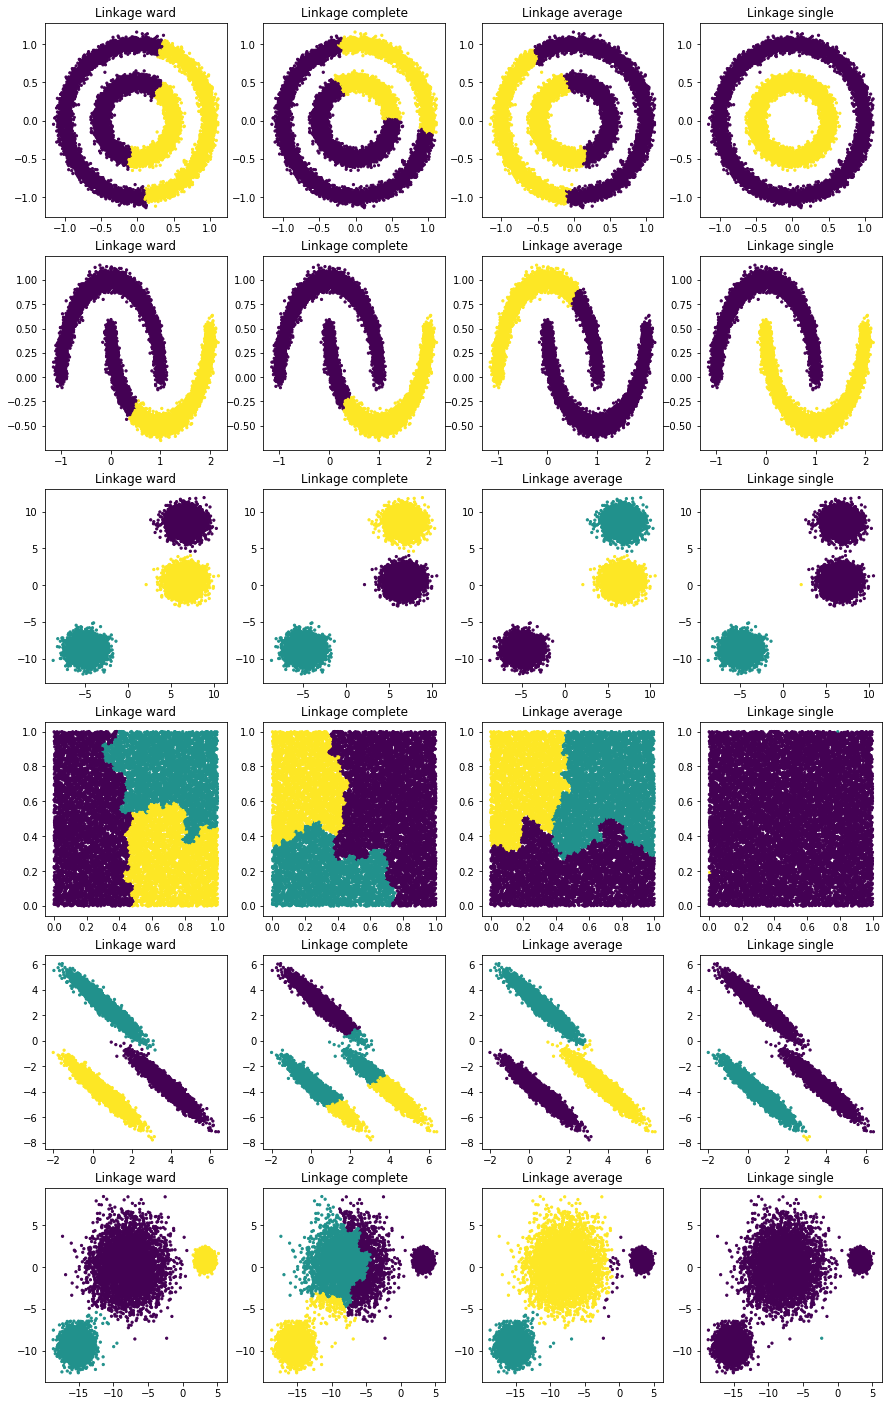

In [30]:
plt.figure(figsize = (15,25))

data = [noisy_circles, 
        noisy_moons, 
        blobs, 
        no_structure,
        blobs_aniso, 
        blobs_varied]

linkage = ["ward", 
           "complete", 
           "average", 
           "single"]

plot_num = 1
for j in enumerate(data):
    for s in enumerate(linkage):

        if np.logical_or([j[0] == 0],[j[0] == 1]):
            n=2
        else:
            n=3
        
        mod_hierarchical = cluster.AgglomerativeClustering(linkage = s[1],
                                                        n_clusters = n)
        mod_hierarchical.fit(j[1])
        
        
        plt.subplot(len(data), len(linkage), plot_num)
        plot_num += 1 
        plt.title("Linkage %s" %(s[1]))
        plt.scatter(j[1][:,0], j[1][:,1], c = mod_hierarchical.labels_,
                    s = 5)
plt.show()

# DBSCAN

In [6]:
from sklearn.neighbors import NearestNeighbors

In [20]:
neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(noisy_circles)
distances, indices = nbrs.kneighbors(noisy_circles)

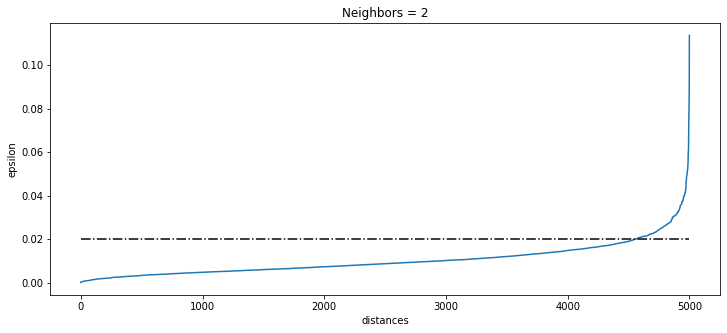

In [23]:
distances = np.sort(distances, axis=0)
dist = distances[:,1]

plt.figure(figsize = (12,5))
plt.plot(dist)
plt.ylabel("epsilon")
plt.xlabel("distances")
plt.title("Neighbors = 2")
plt.plot(np.array([0, 5000]), np.array([0.02, 0.02]), "-." , color = "k")
plt.show()

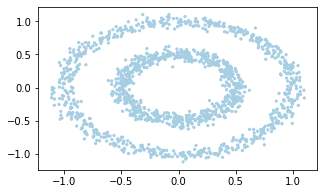

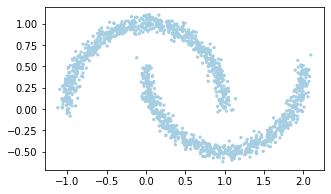

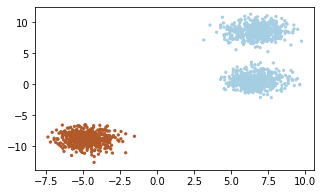

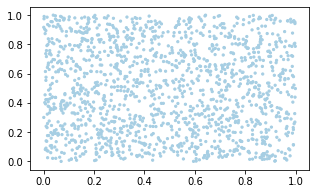

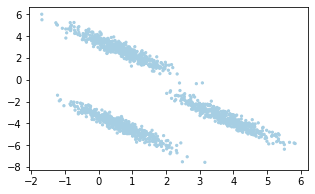

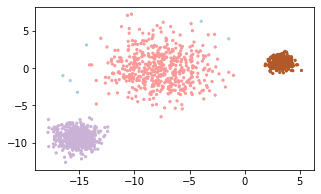

In [49]:
data = [noisy_circles, 
        noisy_moons, 
        blobs, 
        no_structure,
        blobs_aniso, 
        blobs_varied]


for j in enumerate(data):
        
    mod_dbscan = cluster.DBSCAN(eps = 2.5, min_samples = 25)
    mod_dbscan.fit(j[1])
    
    plt.figure(figsize = (5,3))
    plt.scatter(j[1][:,0], j[1][:,1], c = mod_dbscan.labels_,
                    s = 5, cmap = plt.cm.Paired)
    plt.show()

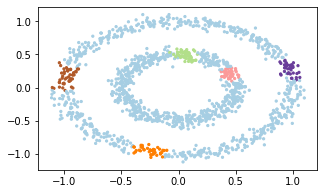

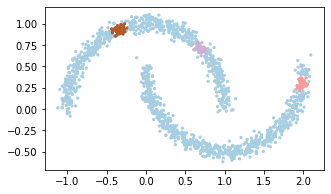

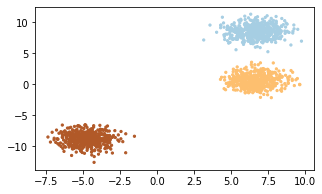

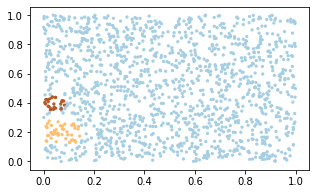

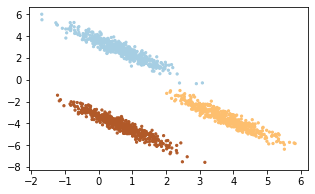

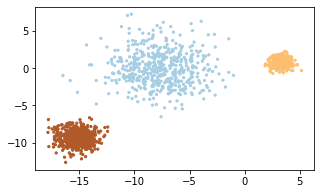

In [30]:
data = [noisy_circles, 
        noisy_moons, 
        blobs, 
        no_structure,
        blobs_aniso, 
        blobs_varied]


for j in enumerate(data):
        
    mod_dbscan = cluster.OPTICS(min_samples = 25)
    mod_dbscan.fit(j[1])
    
    plt.figure(figsize = (5,3))
    plt.scatter(j[1][:,0], j[1][:,1], c = mod_dbscan.labels_,
                    s = 5, cmap = plt.cm.Paired)
    plt.show()

C:\Users\apoghosyan\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


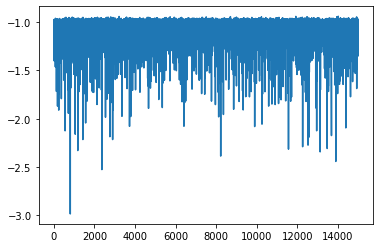

[ 1  1  1 ... -1  1  1]
[0. 0. 0. ... 0. 0. 0.]


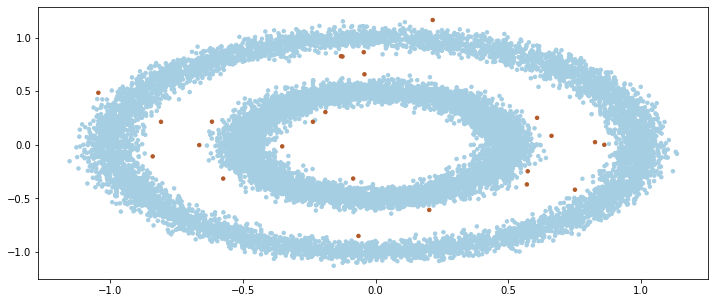

C:\Users\apoghosyan\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


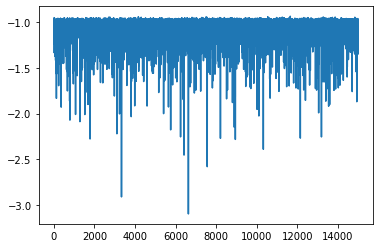

[-1 -1  1 ...  1  1  1]
[0. 0. 0. ... 0. 0. 0.]


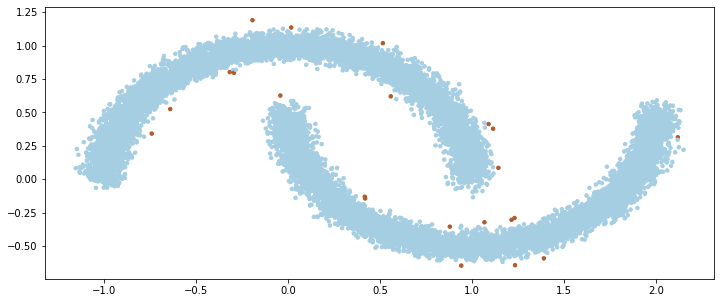

C:\Users\apoghosyan\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


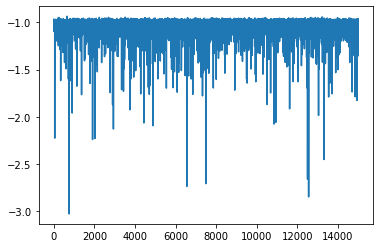

[ 1  1  1 ... -1 -1  1]
[0. 0. 0. ... 0. 0. 0.]


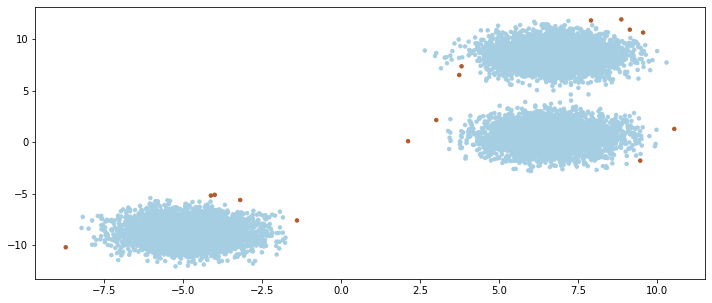

C:\Users\apoghosyan\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


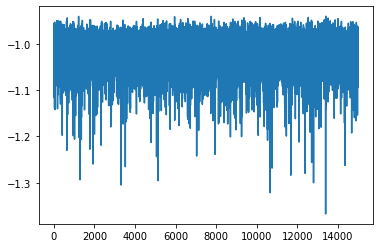

[ 1 -1  1 ...  1  1  1]
[0. 0. 0. ... 0. 0. 0.]


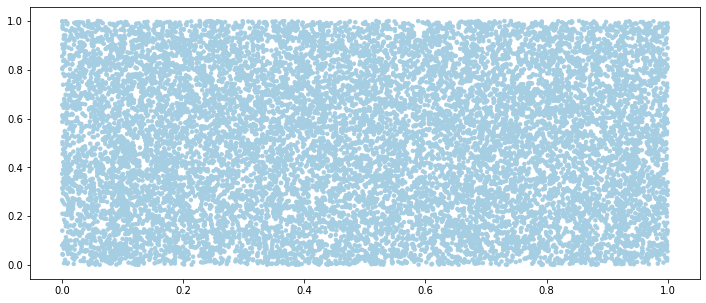

C:\Users\apoghosyan\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


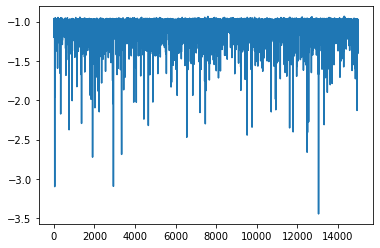

[ 1  1 -1 ... -1  1  1]
[0. 0. 0. ... 0. 0. 0.]


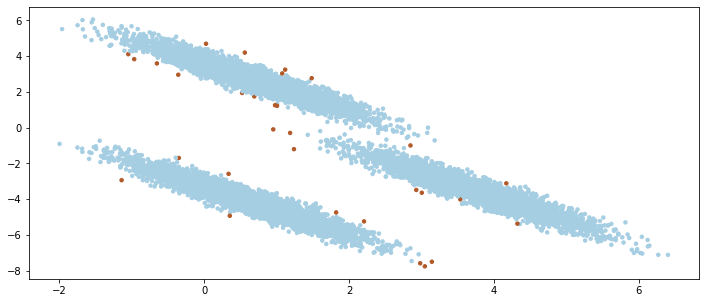

C:\Users\apoghosyan\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


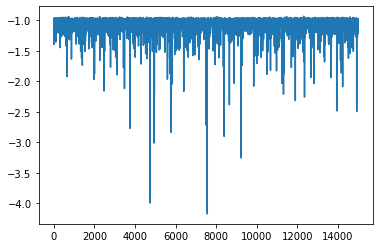

[1 1 1 ... 1 1 1]
[0. 0. 0. ... 0. 0. 0.]


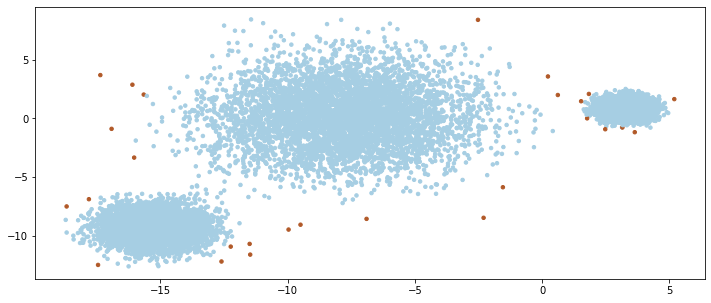

In [63]:
from sklearn.neighbors import LocalOutlierFactor

data = [noisy_circles, 
        noisy_moons, 
        blobs, 
        no_structure,
        blobs_aniso, 
        blobs_varied]


for j in enumerate(data):
        
    mod_lof = LocalOutlierFactor(n_neighbors = 15)
    y_predict = mod_lof.fit_predict(j[1])
    y_predict_new = mod_lof.negative_outlier_factor_
    plt.plot(y_predict_new)
    plt.show()
    ind_minus = (y_predict_new <= -2)
    ind_plus = (y_predict_new > -2)
    y_predict_new[ind_minus] = 1
    y_predict_new[ind_plus] = 0
    print(y_predict)
    print(y_predict_new)
    plt.figure(figsize = (12,5))
    plt.scatter(j[1][:,0], j[1][:,1], c = y_predict_new,
                    s = 12, cmap = plt.cm.Paired)
    plt.show()

In [55]:
y_predict_new[:100]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [51]:
np.sum(y_predict_new <= -7)

151

In [52]:
y_predict_new[y_predict_new <= -7] = -1

In [54]:
y_predict_new[y_predict_new >-7] = 1